In [1]:
import os
import sys
sys.path.append(os.path.abspath('../scripts'))
from expriance_analytics import (
    load_and_prepare_data,
    treat_missing_and_outliers,
    aggregate_per_customer,
    compute_top_bottom_frequent,
    distribution_per_handset_type,
    kmeans_clustering
)

In [2]:
query = """
SELECT * FROM xdr_data
"""
df = load_and_prepare_data(query)
df = treat_missing_and_outliers(df)

c:\Users\Tsega KisPay\Documents\GitHub\TellCo-Telecom-Analytics-Dashboard\scripts\load_data.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


In [3]:
user_aggregated_data = aggregate_per_customer(df)
print("Aggregated Data per Customer:\n", user_aggregated_data.head())

Aggregated Data per Customer:
    MSISDN/Number  avg_tcp_retransmission     avg_rtt  \
0   3.360100e+10            2.080991e+07   46.000000   
1   3.360100e+10            2.080991e+07   30.000000   
2   3.360100e+10            2.080991e+07  109.795706   
3   3.360101e+10            1.066000e+03   69.000000   
4   3.360101e+10            1.507977e+07   57.000000   

                     handset_type  avg_throughput  
0  Huawei P20 Lite Huawei Nova 3E            37.0  
1          Apple iPhone 7 (A1778)            48.0  
2                       undefined            48.0  
3         Apple iPhone 5S (A1457)           204.0  
4         Apple iPhone Se (A1723)         20197.5  


In [4]:
top_10_tcp, bottom_10_tcp, most_frequent_10_tcp = compute_top_bottom_frequent(df, 'TCP DL Retrans. Vol (Bytes)')
print("Top 10 TCP Values:\n", top_10_tcp)
print("Bottom 10 TCP Values:\n", bottom_10_tcp)
print("Most Frequent 10 TCP Values:\n", most_frequent_10_tcp)

Top 10 TCP Values:
            Bearer Id            Start  Start ms             End  End ms  \
121404  7.277826e+18   4/28/2019 4:17     515.0  4/29/2019 4:17   510.0   
121439  1.304243e+19   4/28/2019 4:18     742.0  4/29/2019 4:18   720.0   
61581   1.304243e+19   4/26/2019 4:48     239.0  4/27/2019 3:06   336.0   
79919   1.304243e+19   4/27/2019 7:45      85.0  4/28/2019 2:55   109.0   
105586  1.304243e+19  4/27/2019 10:42     788.0  4/29/2019 0:00   269.0   
42552   1.304243e+19   4/25/2019 5:19     233.0  4/26/2019 5:19   263.0   
37815   1.304243e+19   4/25/2019 2:31     247.0  4/26/2019 2:31   213.0   
786     1.304243e+19   4/24/2019 0:22     304.0  4/25/2019 0:22   235.0   
61170   1.304243e+19   4/26/2019 4:23      87.0  4/27/2019 4:23   993.0   
61552   7.277826e+18   4/26/2019 4:46     277.0  4/27/2019 4:46   160.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
121404    86399.0  2.082009e+14   3.365091e+10  8.637690e+13   
121439    86399.0  2.08201

In [5]:
top_10_rtt, bottom_10_rtt, most_frequent_10_rtt = compute_top_bottom_frequent(df, 'Avg RTT DL (ms)')
print("Top 10 RTT Values:\n", top_10_rtt)
print("Bottom 10 RTT Values:\n", bottom_10_rtt)
print("Most Frequent 10 RTT Values:\n", most_frequent_10_rtt)

Top 10 RTT Values:
            Bearer Id            Start  Start ms              End  End ms  \
13639   6.917538e+18  4/24/2019 18:22     725.0   4/25/2019 2:06    86.0   
92460   6.917538e+18  4/27/2019 15:21     906.0  4/27/2019 23:28   559.0   
138828  6.917538e+18   4/29/2019 2:31     512.0   4/30/2019 1:27   853.0   
34853   6.917538e+18   4/25/2019 0:23     753.0   4/26/2019 0:15   102.0   
96422   6.917538e+18  4/27/2019 16:37     258.0   4/28/2019 0:15    74.0   
12953   1.268214e+19  4/24/2019 18:08     928.0   4/25/2019 0:09   472.0   
17861   6.917538e+18  4/24/2019 19:33     493.0   4/25/2019 1:02   403.0   
112079  1.304243e+19  4/27/2019 21:21     718.0   4/29/2019 0:57    31.0   
8498    1.304243e+19  4/24/2019 15:19      89.0   4/25/2019 3:23   452.0   
7444    6.917538e+18  4/24/2019 13:49     291.0   4/25/2019 0:06   332.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
13639     27858.0  2.082014e+14   3.366755e+10  8.670520e+13   
92460     29243

In [6]:
top_10_throughput, bottom_10_throughput, most_frequent_10_throughput = compute_top_bottom_frequent(df, 'Avg Bearer TP DL (kbps)')
print("Top 10 Throughput Values:\n", top_10_throughput)
print("Bottom 10 Throughput Values:\n", bottom_10_throughput)
print("Most Frequent 10 Throughput Values:\n", most_frequent_10_throughput)

Top 10 Throughput Values:
            Bearer Id            Start  Start ms             End  End ms  \
88606   7.277826e+18  4/27/2019 13:29     705.0  4/28/2019 0:57   257.0   
79204   1.304243e+19   4/27/2019 6:17     185.0  4/28/2019 0:25   332.0   
628     7.277826e+18   4/24/2019 0:08      88.0  4/25/2019 0:08    42.0   
95687   7.277826e+18  4/27/2019 16:26     660.0  4/28/2019 5:00   280.0   
49096   7.349883e+18   4/25/2019 7:46     708.0  4/26/2019 7:35   490.0   
91145   7.277826e+18  4/27/2019 14:42     104.0  4/28/2019 0:26   356.0   
76931   1.304243e+19   4/27/2019 1:28     853.0  4/28/2019 1:28   879.0   
2887    1.304243e+19   4/24/2019 3:09     260.0  4/25/2019 3:09   235.0   
1334    7.277826e+18   4/24/2019 1:23     183.0  4/25/2019 1:23   215.0   
145589  7.277826e+18   4/29/2019 6:14     910.0  4/30/2019 6:14   828.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
88606     41289.0  2.082022e+14   3.369822e+10  3.573571e+13   
79204     65272.0  

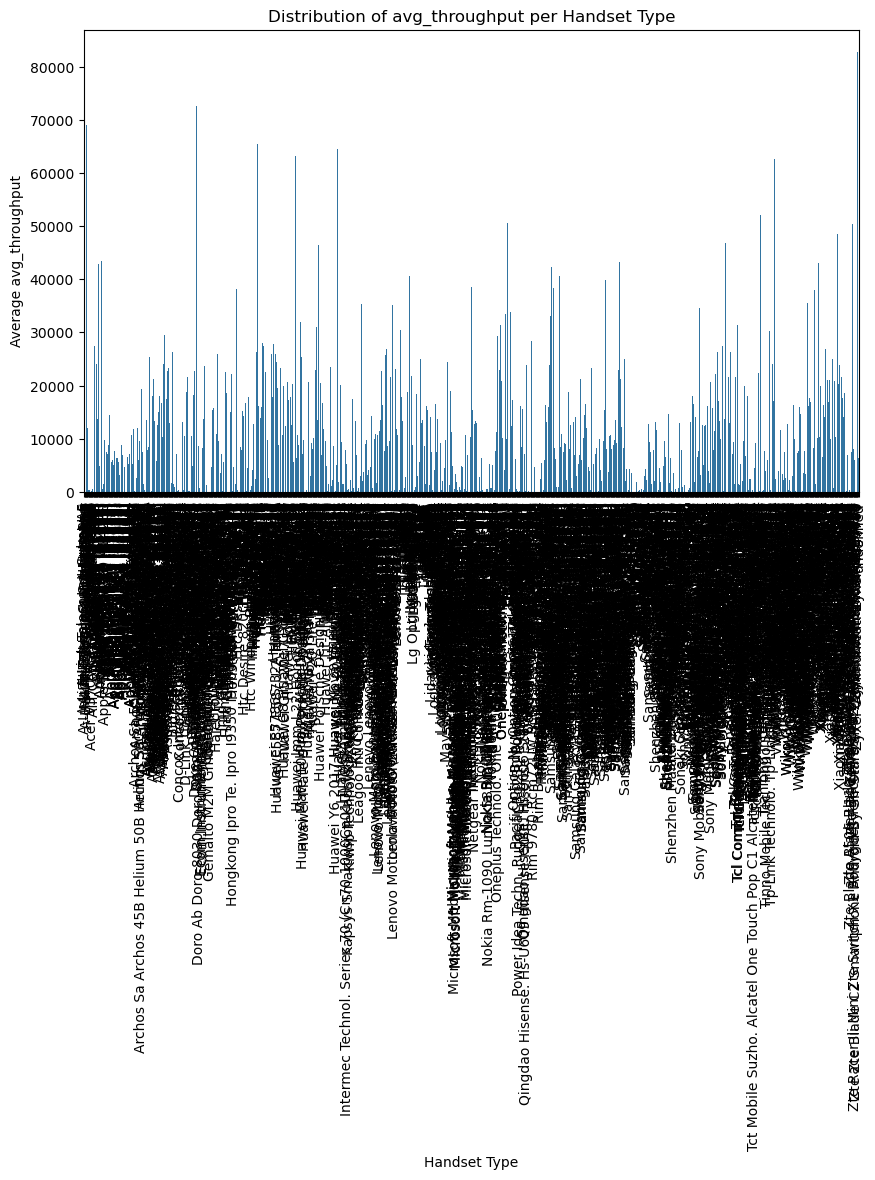

Throughput Distribution per Handset Type:
                                            handset_type  avg_throughput
0                            A-Link Telecom I. Cubot A5    23184.000000
1                     A-Link Telecom I. Cubot Note Plus     6527.000000
2                        A-Link Telecom I. Cubot Note S     8515.000000
3                          A-Link Telecom I. Cubot Nova    55667.000000
4                         A-Link Telecom I. Cubot Power    69126.000000
...                                                 ...             ...
1389  Zte Zte Blade C2 Smartphone Android By Sfr Sta...       44.500000
1390                          Zyxel Communicat. Lte7460    39741.000000
1391                          Zyxel Communicat. Sbg3600    82818.000000
1392                    Zyxel Communicat. Zyxel Wah7706     1263.000000
1393                                          undefined     6408.508943

[1394 rows x 2 columns]


In [7]:
throughput_distribution = distribution_per_handset_type(user_aggregated_data, 'avg_throughput')
print("Throughput Distribution per Handset Type:\n", throughput_distribution)

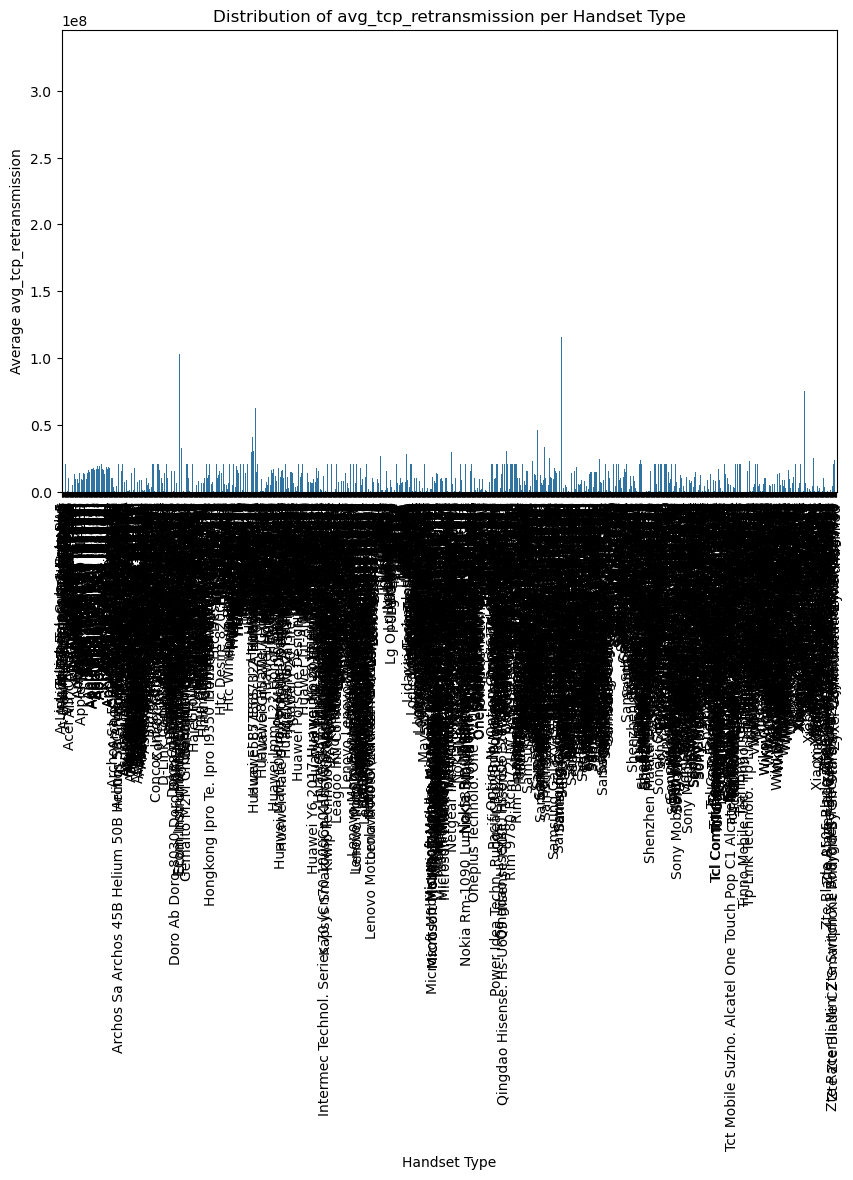

TCP Retransmission Distribution per Handset Type:
                                            handset_type  \
0                            A-Link Telecom I. Cubot A5   
1                     A-Link Telecom I. Cubot Note Plus   
2                        A-Link Telecom I. Cubot Note S   
3                          A-Link Telecom I. Cubot Nova   
4                         A-Link Telecom I. Cubot Power   
...                                                 ...   
1389  Zte Zte Blade C2 Smartphone Android By Sfr Sta...   
1390                          Zyxel Communicat. Lte7460   
1391                          Zyxel Communicat. Sbg3600   
1392                    Zyxel Communicat. Zyxel Wah7706   
1393                                          undefined   

      avg_tcp_retransmission  
0               2.080991e+07  
1               6.023490e+05  
2               4.134448e+07  
3               1.358400e+05  
4               7.799000e+03  
...                      ...  
1389            1.04062

In [8]:
tcp_retransmission_distribution = distribution_per_handset_type(user_aggregated_data, 'avg_tcp_retransmission')
print("TCP Retransmission Distribution per Handset Type:\n", tcp_retransmission_distribution)

In [9]:
clustered_data, kmeans = kmeans_clustering(user_aggregated_data)
print("Clustered Data:\n", clustered_data.head())

Clustered Data:
    MSISDN/Number  avg_tcp_retransmission   avg_rtt  \
0   3.360100e+10                0.357178 -0.328792   
1   3.360100e+10                0.357178 -0.452755   
2   3.360100e+10                0.357178  0.165478   
3   3.360101e+10               -1.008059 -0.150595   
4   3.360101e+10               -0.018768 -0.243567   

                     handset_type  avg_throughput  cluster  
0  Huawei P20 Lite Huawei Nova 3E       -0.601944        1  
1          Apple iPhone 7 (A1778)       -0.601275        1  
2                       undefined       -0.601275        1  
3         Apple iPhone 5S (A1457)       -0.591792        1  
4         Apple iPhone Se (A1723)        0.623536        1  


In [10]:
cluster_stats = clustered_data.groupby('cluster').agg({
    'avg_tcp_retransmission': ['min', 'max', 'mean', 'sum'],
    'avg_rtt': ['min', 'max', 'mean', 'sum'],
    'avg_throughput': ['min', 'max', 'mean', 'sum']
}).reset_index()
print("Cluster Statistics:\n", cluster_stats)

Cluster Statistics:
   cluster avg_tcp_retransmission                                      avg_rtt  \
                             min        max      mean           sum       min   
0       0              -1.008129  14.717442 -0.504452  -1016.975814  2.762538   
1       1              -1.008129  23.115227  0.173120  14144.942560 -0.685186   
2       2              -1.008127   9.636867 -0.567475 -13127.966746 -0.568971   

                                     avg_throughput                      \
         max      mean           sum            min       max      mean   
0  13.159946  5.835668  11764.707288      -0.604193  4.556069 -0.162940   
1   4.180367 -0.114033  -9317.152444      -0.604193  4.562938 -0.449399   
2   3.227400 -0.105799  -2447.554844       0.285960  4.573150  1.601414   

                 
            sum  
0   -328.487779  
1 -36718.632448  
2  37047.120227  
